# Predicting the future variance of HSI
# Method

Predict the Variance for t directly using raw value of t-30 to t-1.

Importing Dependency

In [1]:
%matplotlib inline
%matplotlib notebook
# data analysis
import numpy as np
import pandas
import math
#data visulization
import matplotlib.pyplot as plt
#building the network
from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Using TensorFlow backend.


Loading the dataset, as well as splitting up the data into training and testing using a 67% split

In [2]:
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [3]:
train_size, test_size

(131, 65)

As it show, we have 131 Training Sample, and 65 Testing Sample
# creating the dataset
We must create a moving window for our dataset.  
Our training X must contain 29 value T-30 to T-1. And our corresponding Y will be the actual value at T

Recall that
\begin{equation}\label{eq:}
\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
\end{equation}

Notice that here, we manipulate the date by calculating the mean of t-30 to t-1.  
and subtracting the mean from each value point


In [4]:
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                #finding the mean
                mean = np.mean(a)
                #finding the variance
                newvar = np.var(a)
                #subtracting the mean from the data
                a = a -mean
                dataX.append(a)
                dataY.append(newvar)
        return np.array(dataX), np.array(dataY)

In [5]:
look_back = 29
epoch = 200
###
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Again, we can take a look at the data.

In [6]:
trainX[:3,]

array([[-938.70117188, -865.26171875, -603.76171875, -446.00195312,
        -621.95117188, -170.66015625, -251.73046875,  -97.77148438,
        -315.890625  ,  109.6484375 ,  303.51953125,  292.37890625,
         394.55859375,  140.77929688, -129.16015625, -226.84179688,
        -142.45117188,   52.65820312,  -99.02148438,  317.16992188,
         611.23828125,  585.45898438,  684.83984375,  676.34960938,
         303.79882812,  272.06835938,  295.578125  ,  -99.18164062,
         -31.66015625],
       [-897.52929688, -636.02929688, -478.26953125, -654.21875   ,
        -202.92773438, -283.99804688, -130.0390625 , -348.15820312,
          77.38085938,  271.25195312,  260.11132812,  362.29101562,
         108.51171875, -161.42773438, -259.109375  , -174.71875   ,
          20.390625  , -131.2890625 ,  284.90234375,  578.97070312,
         553.19140625,  652.57226562,  644.08203125,  271.53125   ,
         239.80078125,  263.31054688, -131.44921875,  -63.92773438,
         -35.21875   ],


In [7]:
trainY[:3]

array([ 181242.40625  ,  149816.734375 ,  123415.2421875], dtype=float32)

Doing some simple preparation for later comparison

In [8]:

def comparison(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

In [19]:

predictionX , PredictionY = comparison(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)


Constructing our model. We will build a network in the form of
29->[30]->[300]->[900]->[50]->1. Using relu as our activation function

In [11]:

model = Sequential()

model.add(Dense(30,input_dim=look_back, activation='linear'))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(900,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1,activation='linear'))


using mean square error as our lost function and adam as our gradient descent

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

running the network

In [13]:
model.fit(trainX, trainY, epochs=epoch, batch_size=2, verbose=2)

Epoch 1/200
1s - loss: 18304189671.9208
Epoch 2/200
0s - loss: 1231336728.1584
Epoch 3/200
0s - loss: 815559148.5644
Epoch 4/200
0s - loss: 489595053.5941
Epoch 5/200
0s - loss: 507179207.7426
Epoch 6/200
0s - loss: 579301196.7580
Epoch 7/200
0s - loss: 260735271.9802
Epoch 8/200
0s - loss: 348938724.7426
Epoch 9/200
0s - loss: 275190010.9443
Epoch 10/200
0s - loss: 229419474.8045
Epoch 11/200
0s - loss: 245348472.6460
Epoch 12/200
0s - loss: 293403437.3837
Epoch 13/200
0s - loss: 205712367.8812
Epoch 14/200
0s - loss: 248418623.9653
Epoch 15/200
0s - loss: 185917341.6825
Epoch 16/200
0s - loss: 234826309.9802
Epoch 17/200
0s - loss: 187301992.4554
Epoch 18/200
0s - loss: 164029657.2361
Epoch 19/200
0s - loss: 153376407.1287
Epoch 20/200
0s - loss: 110300103.2679
Epoch 21/200
0s - loss: 165627923.2772
Epoch 22/200
0s - loss: 130700136.4298
Epoch 23/200
0s - loss: 98384971.5272
Epoch 24/200
0s - loss: 129126899.1064
Epoch 25/200
0s - loss: 163718989.5285
Epoch 26/200
0s - loss: 11828106

evaluating our network score

In [14]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 38270724.29 MSE (6186.33 RMSE)
Test Score: 1146105870.63 MSE (33854.19 RMSE)


# plot

<IPython.core.display.Javascript object>


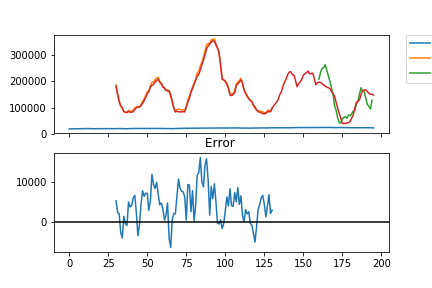

In [20]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:len(trainPredict)+look_back+1, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

f, axarr = plt.subplots(2,sharex=True,squeeze=False)
axarr = axarr.flatten()

axarr[0].plot(dataset,label = "dataset")
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')



error = trainPredictPlot.flatten() - Rvar
axarr[1].plot(error)
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()

# FULL CODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics


np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                newvar = np.var(a)
                a = a -mean
                dataX.append(a)
                dataY.append(newvar)
        return np.array(dataX), np.array(dataY)
##


f, axarr = plt.subplots(2,sharex=True,squeeze=False)

axarr = axarr.flatten()
def create_dataset2(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]



                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

look_back = 29
epoch = 1000

###
predictionX , PredictionY = create_dataset2(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)


axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
###


trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()

model.add(Dense(30,input_dim=look_back, activation='linear'))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(900,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1,activation='linear'))



model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=2, verbose=2)



trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:len(trainPredict)+look_back+1, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict



axarr[0].plot(dataset,label = "dataset")
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




error = trainPredictPlot.flatten() - Rvar
axarr[1].plot(error)
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()
